In [1]:
#imports
import pandas as pd 
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# TASK 1 : import dataset
DATA = pd.read_csv("mammographic_masses_data.csv")


In [7]:


# TASK 2 : Plotting data
#2.1 describing the data, these two functions allow a general sense of the type of data and provide a count for the benign and malignant cases
print(DATA.describe())
print(DATA['Severity'].value_counts())

#Creating heatmap for features that aren't nominal
data_subset = DATA[["BA", "Age", "Density", "Severity"]]

# Display the margins where the severity is 1, using the loc function
severity_margins = DATA.loc[DATA['Severity'] == 1, 'Margin']

print(severity_margins)




corr_matrix = data_subset.corr()

fig = px.imshow(corr_matrix, 
                labels=dict(x="Features", y="Features", color="Correlation"),
                x=corr_matrix.columns,
                y=corr_matrix.columns,
                color_continuous_scale='RdBu',
                zmin=-1, zmax=1, text_auto = True,
                title = "Correlation Heatmap of All Ordinal/Numerical Features")

fig.show()

# Use the .map function to create a severity column with appropriate names, which helps to make the box plot more understandable
DATA['Severity_Label'] = DATA['Severity'].map({0: 'Benign', 1: 'Malignant'})
fig2 = px.box(DATA, x='Severity_Label', y='Age', color='Severity_Label',
             title="Box Plot of Age by Severity of Tumor (Benign vs Malignant)",
             labels={"Severity_Label": "Tumor Severity", "Age": "Patient Age"},
                color_discrete_map={'Benign': 'blue', 'Malignant': 'red'})
fig2.show()


# Create a box plot using age and BIRADS assessment
DATA['BA_Label'] = DATA['BA'].map({0: 'No Data', 1: 1, 2:2, 3:3, 4:4, 5:5, 6:6})
fig3 = px.box(DATA, x='BA_Label', y='Age',
                 title="Box Plot of Age vs BI-RADS",
                 labels={ "Age": "Patient Age", "BA_Label": "BI-RADS Assessment"})

fig3.show()

fig4 = px.violin(DATA, y='Age', x='Severity_Label', 
                title="Violin Plot: Age Distribution for Benign vs Malignant Tumors",
                labels={"Severity_Label": "Tumor Type", "Age": "Patient Age"},
                color='Severity_Label', 
                color_discrete_map={'Benign': 'blue', 'Malignant': 'red'})

# Show the plot
fig4.show()

               BA         Age       Shape      Margin     Density    Severity
count  959.000000  956.000000  930.000000  913.000000  885.000000  961.000000
mean     4.300313   55.487448    2.721505    2.796276    2.910734    0.463059
std      0.683469   14.480131    1.242792    1.566546    0.380444    0.498893
min      0.000000   18.000000    1.000000    1.000000    1.000000    0.000000
25%      4.000000   45.000000    2.000000    1.000000    3.000000    0.000000
50%      4.000000   57.000000    3.000000    3.000000    3.000000    0.000000
75%      5.000000   66.000000    4.000000    4.000000    3.000000    1.000000
max      6.000000   96.000000    4.000000    5.000000    4.000000    1.000000
Severity
0    516
1    445
Name: count, dtype: int64
0      5.0
1      1.0
2      5.0
4      5.0
8      5.0
      ... 
951    5.0
952    4.0
955    4.0
957    5.0
959    5.0
Name: Margin, Length: 445, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_12612\1567539238.py:21: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\User\AppData\Local\Temp\ipykernel_12612\1567539238.py:21: FutureWarning:

Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.



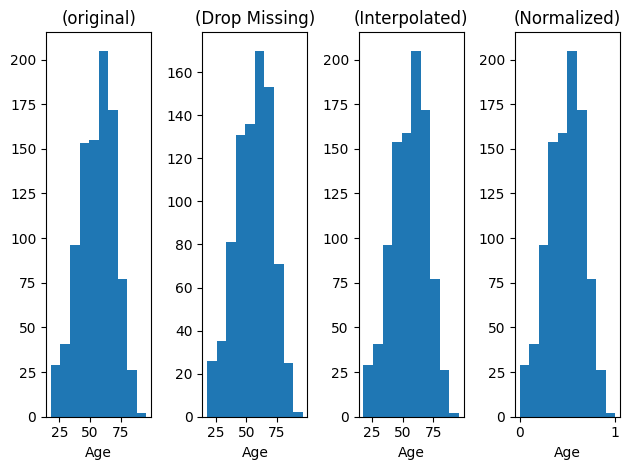

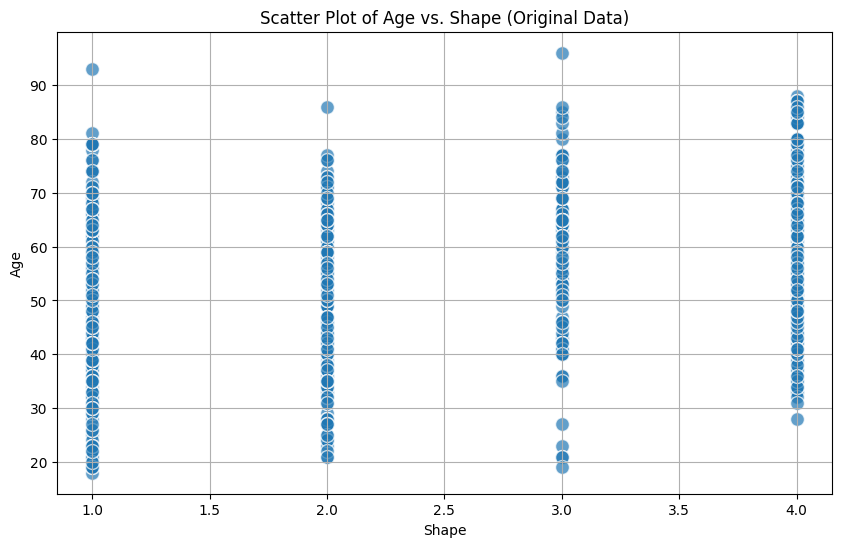

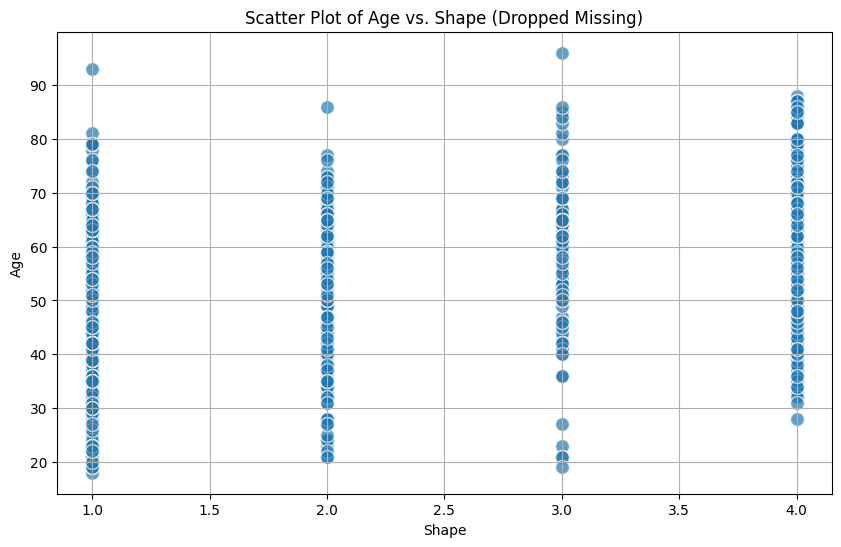

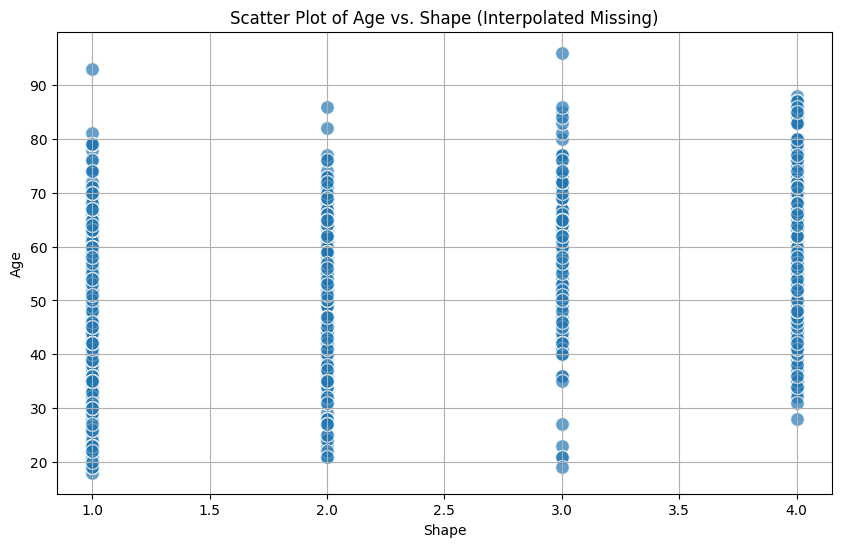

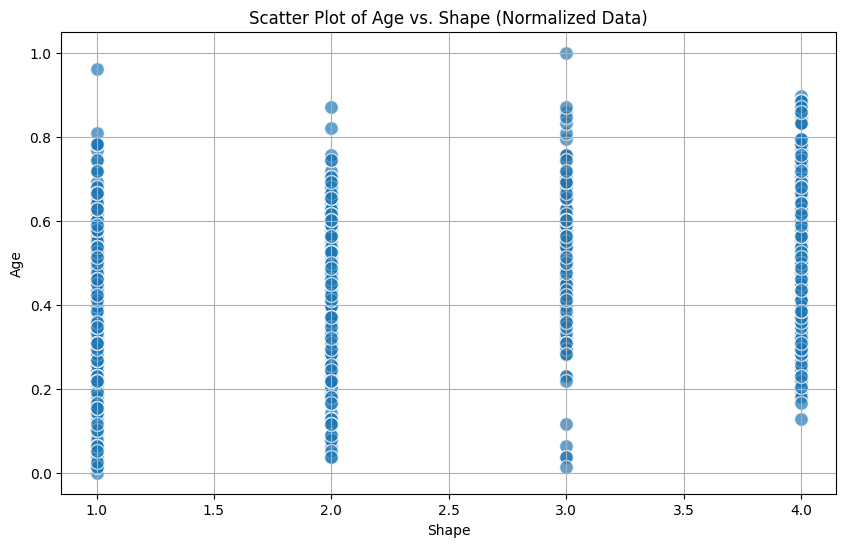

In [9]:
# TASK 3 : data preprocessing
interpolateDATA = DATA.copy()


# TASK 3.1
fig, plot = plt.subplots(1, 4)
plot[0].hist(interpolateDATA["Age"])
plot[0].set_title("(original)")
plot[0].set_xlabel("Age")

dropMissing = DATA.dropna()


plot[1].hist(dropMissing["Age"])
plot[1].set_title("(Drop Missing)")
plot[1].set_xlabel("Age")


# CLEANING : fill missing values using the most probable value using linear interpolation
for columns in interpolateDATA.columns.to_list():
    interpolateDATA[columns].interpolate(method='linear', inplace=True)
    interpolateDATA[columns] = interpolateDATA[columns].round()


plot[2].hist(interpolateDATA["Age"])
plot[2].set_title("(Interpolated)")
plot[2].set_xlabel("Age")


normalizeDATA = interpolateDATA.copy()
# TASK 3.2
# NORMALIZATION : min-max normalization on the Age column
normalizeDATA['Age'] = (normalizeDATA['Age'] - normalizeDATA['Age'].min()) / (normalizeDATA['Age'].max() - normalizeDATA['Age'].min()) 
# we could also use normalization on ordinal parameters such as BA and Density
do_normalize_ordinal = True
for column in ["Density"]:
    if do_normalize_ordinal: normalizeDATA[column] = (normalizeDATA[column] - normalizeDATA[column].min()) /(normalizeDATA[column].max() - normalizeDATA[column].min())

plot[3].hist(normalizeDATA["Age"])
plot[3].set_title("(Normalized)")
plot[3].set_xlabel("Age")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(DATA['Shape'], DATA['Age'], alpha=0.7, edgecolors='w', s=100)
plt.title('Scatter Plot of Age vs. Shape (Original Data)')
plt.xlabel('Shape')
plt.ylabel('Age')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(dropMissing['Shape'], dropMissing['Age'], alpha=0.7, edgecolors='w', s=100)
plt.title('Scatter Plot of Age vs. Shape (Dropped Missing)')
plt.xlabel('Shape')
plt.ylabel('Age')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(interpolateDATA['Shape'], interpolateDATA['Age'], alpha=0.7, edgecolors='w', s=100)
plt.title('Scatter Plot of Age vs. Shape (Interpolated Missing)')
plt.xlabel('Shape')
plt.ylabel('Age')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(normalizeDATA['Shape'], normalizeDATA['Age'], alpha=0.7, edgecolors='w', s=100)
plt.title('Scatter Plot of Age vs. Shape (Normalized Data)')
plt.xlabel('Shape')
plt.ylabel('Age')
plt.grid(True)
plt.show()

Index(['Shape', 'Margin', 'Severity'], dtype='object')
[[3. 5. 1.]
 [1. 1. 1.]
 [4. 5. 1.]
 ...
 [4. 5. 0.]
 [4. 5. 1.]
 [3. 3. 0.]]
Scores for each feature: [ 27.0155508   59.05384755  69.38456957   2.11404797 115.17110288]


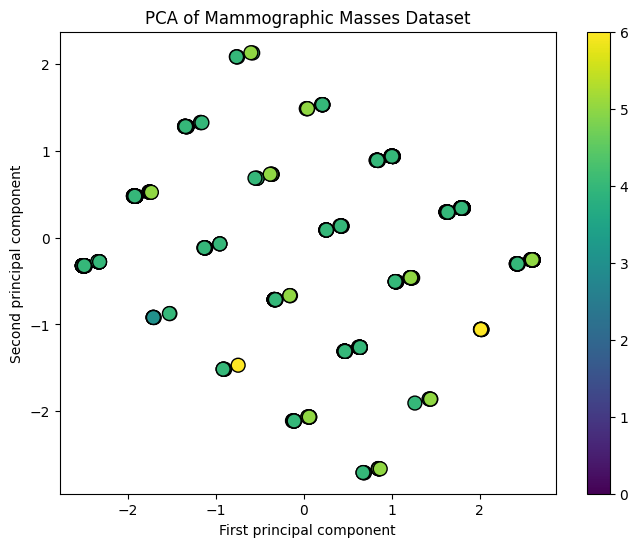

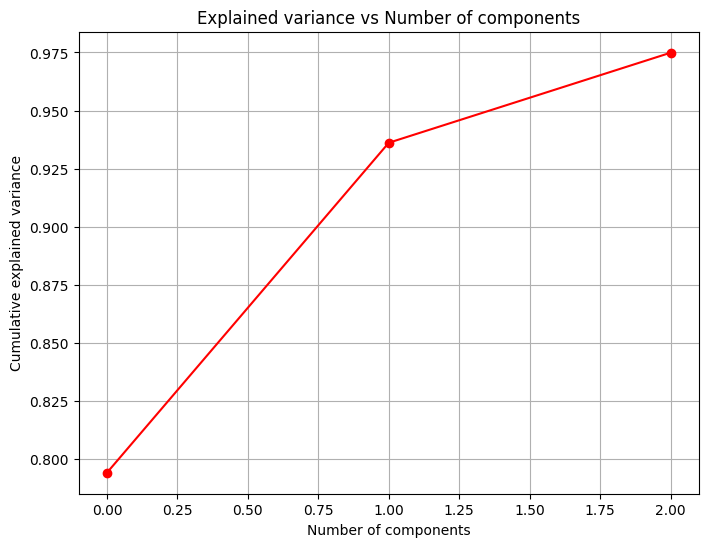

In [10]:
import numpy as np
# TASK 4 : data feature engineering (//nog niet klaar)
cDATA = normalizeDATA.copy()
# TASK 4.1
# AUTOMATIC FEATURE SELECTION : using univariate feature selection (for a classification problem)
y = cDATA["BA"]
features = ["Age", "Shape", "Margin", "Density", "Severity"]
x = cDATA[features]

make_selection = SelectKBest(score_func=f_classif, k=3)
selected_x = make_selection.fit_transform(x, y)

selected_feature_mask = x.columns[make_selection.get_support()]

# What features got selected
print(selected_feature_mask)

# New table with selected features
print(selected_x)

# Scores of the features
print("Scores for each feature:", make_selection.scores_)


# TASK 4.2 
# PCA Dimensionality Reduction 
pca = sk.decomposition.PCA(n_components=3)

x_pca = pca.fit_transform(x)


plt.figure(figsize=(8,6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA of Mammographic Masses Dataset')
plt.colorbar()
plt.show()


# TASK 4.3
# Truncated SVD

svd = sk.decomposition.TruncatedSVD(n_components=3)
x_svd = svd.fit_transform(x)

explained_variance = svd.explained_variance_ratio_
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='-', color='r')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance vs Number of components')
plt.grid(True)
plt.show()